# Import packages & set plot style

In [5]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import re
import dash
import plotly.graph_objects as go

%matplotlib inline

In [2]:
plt.style.use('ggplot')

# Get the data ready

#### Load the dataset

In [16]:
file_path = '/home/jovyan/work/'
file_name = 'collision_2009_2018'
input_data = os.path.join(file_path, file_name+'.csv')
input_data

'/home/jovyan/work/collision_2009_2018.csv'

In [21]:
collision = pd.read_csv(input_data, parse_dates=(['COLLISION_DATE']))
collision.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE
0,3918943,2009,20091202,1942,2009-03-23,1745,35046,1283,1,5,...,0,0,0,0,0,0,-,-,NaN,NaN
1,3984219,2009,20090115,1942,2009-01-03,540,33829,1701,6,5,...,0,0,0,0,0,0,-,-,NaN,NaN
2,3984274,2009,20090126,1942,2009-01-07,630,38614,152,3,5,...,1,0,0,0,0,0,-,-,NaN,NaN
3,3984281,2009,20090126,1942,2009-01-08,50,32896,1985,4,5,...,0,0,0,0,0,0,-,-,NaN,NaN
4,3984352,2009,20100914,1942,2009-01-11,1450,24517,2014,7,5,...,0,0,0,0,1,0,-,-,NaN,NaN


#### Make column headers lower case

In [22]:
collision.columns = map(str.lower, collision.columns)
collision.columns

Index(['case_id', 'accident_year', 'proc_date', 'juris', 'collision_date',
       'collision_time', 'officer_id', 'reporting_district', 'day_of_week',
       'chp_shift', 'population', 'cnty_city_loc', 'special_cond', 'beat_type',
       'chp_beat_type', 'city_division_lapd', 'chp_beat_class', 'beat_number',
       'primary_rd', 'secondary_rd', 'distance', 'direction', 'intersection',
       'weather_1', 'weather_2', 'state_hwy_ind', 'caltrans_county',
       'caltrans_district', 'state_route', 'route_suffix', 'postmile_prefix',
       'postmile', 'location_type', 'ramp_intersection', 'side_of_hwy',
       'tow_away', 'collision_severity', 'number_killed', 'number_injured',
       'party_count', 'primary_coll_factor', 'pcf_code_of_viol',
       'pcf_viol_category', 'pcf_violation', 'pcf_viol_subsection',
       'hit_and_run', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'chp_road_type', 'pedestrian_

#### Drop unnecessary columns and set index column

In [23]:
to_drop = [
    'officer_id', 
    'reporting_district', 
    'chp_shift', 
    'cnty_city_loc', 
    'beat_type', 
    'chp_beat_type', 
    'city_division_lapd',
    'chp_beat_class', 
    'beat_number', 
    'caltrans_county', 
    'caltrans_district'
]

collision.drop(to_drop, axis=1, inplace=True)
collision.set_index('collision_date', inplace=True)
collision.head()

,case_id,accident_year,proc_date,juris,collision_time,day_of_week,population,special_cond,primary_rd,secondary_rd,...,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude
collision_date,,,,,,,,,,,,,,,,,,,,,
2009-03-23,3918943,2009,20091202,1942,1745,1,7,0,WESTERN AV,CENTURY BL,...,0,0,0,0,0,0,-,-,NaN,NaN
2009-01-03,3984219,2009,20090115,1942,540,6,7,0,TAMPA AV,PINE VALLEY AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009-01-07,3984274,2009,20090126,1942,630,3,7,0,5TH ST,FLOWER ST,...,1,0,0,0,0,0,-,-,NaN,NaN
2009-01-08,3984281,2009,20090126,1942,50,4,7,0,VAN NUYS BL,VESPER AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009-01-11,3984352,2009,20100914,1942,1450,7,7,0,HARVARD BL,3RD ST,...,0,0,0,0,1,0,-,-,NaN,NaN


#### Data labeling

In [24]:
# day of week
dowdict = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

collision['day_of_week'].replace(
    to_replace=[i for i in dowdict.keys()], 
    value=[i for i in dowdict.values()],
    inplace=True
)


# type of collision
tocdict = {
    'A': 'Head-On',
    'B': 'Sideswipe',
    'C': 'Rear End',
    'D': 'Broadside',
    'E': 'Hit Object',
    'F': 'Overturned',
    'G': 'Vehicle/Pedestrian',
    'H': 'Other',
    '-': 'Not Stated'
}

collision['type_of_collision'].replace(
    to_replace=[i for i in tocdict.keys()],
    value=[i for i in tocdict.values()],
    inplace=True
)


# violation category 
vcdict = {
    '0': 'Unknown',
    '1': 'Driving or Bicycling Under the Influence of Alcohol or Drug',
    '2': 'Impeding Traffic',
    '3': 'Unsafe Speed',
    '4': 'Following Too Closely',
    '5': 'Wrong Side of Road',
    '6': 'Improper Passing',
    '7': 'Unsafe Lane Change',
    '8': 'Improper Turning',
    '9': 'Automobile Right of Way',
    '10': 'Pedestrian Right of Way',
    '11': 'Pedestrian Violation',
    '12': 'Traffic Signals and Signs',
    '13': 'Hazardous Parking',
    '14': 'Lights',
    '15': 'Brakes',
    '16': 'Other Equipment',
    '17': 'Other Hazardous Violation',
    '18': 'Other Than Driver (or Pedestrian)',
    '19': None,
    '20': None,
    '21': 'Unsafe Starting or Backing',
    '22': 'Other Improper Driving',
    '23': 'Pedestrian or "Other" Under the Influence of Alcohol or Drug',
    '24': 'Fell Asleep',
    '- ': 'Not Stated'
}

collision['pcf_viol_category'].replace(
    to_replace=[i for i in vcdict.keys()],
    value=[i for i in vcdict.values()],
    inplace=True
)


# collission severity 
csdict = {
    0: 'Property Damage Only',
    1: 'Injury level 4: Fatal',
    2: 'Injury level 3: Severe',
    3: 'Injury level 2: Other Visible',
    4: 'Injury level 1: Complaint of Pain'
}

collision['collision_severity'].replace(
    to_replace=[i for i in csdict.keys()],
    value=[i for i in csdict.values()],
    inplace=True
)


# location type labeling
ltdict = {
    'H': 'Highway',
    'I': 'Intersection',
    'R': 'Ramp'
}

collision['location_type'].replace(
    to_replace=[i for i in ltdict.keys()],
    value=[i for i in ltdict.values()],
    inplace=True
)


# weather labeling
weatherdict = {
    'A': 'Clear',
    'B': 'Cloudy',
    'C': 'Raining',
    'D': 'Snowing',
    'E': 'Fog',
    'F': 'Other',
    'G': 'Wind',
    '- ': 'Not stated'
}

collision['weather_1'].replace(
    to_replace=[i for i in weatherdict.keys()], 
    value=[i for i in weatherdict.values()], 
    inplace=True
)

#### Add time period attributes based on collision time
- Early morning: 12AM - 6AM
- AM Peak: 6AM - 9:30AM
- Midday: 9:30AM - 2PM
- PM Peak: 2PM - 6:30PM
- Evening: 6:30PM - 12AM

In [25]:
ranges = [0, 600, 930, 1400, 1830, 2400]
labels = ['Early Morning', 'AM Peak', 'Midday', 'PM Peak', 'Evening']

collision['time_period'] = pd.cut(
    collision['collision_time'], 
    ranges, 
    labels=labels
).astype('category')

collision[['collision_time', 'time_period']].head()

,collision_time,time_period
collision_date,,
2009-03-23,1745,PM Peak
2009-01-03,540,Early Morning
2009-01-07,630,AM Peak
2009-01-08,50,Early Morning
2009-01-11,1450,PM Peak


#### Add hour of day attributes based on collision time

In [26]:
ranges = list(np.arange(0, 2401, 100))
labels = list(np.arange(0, 24))
collision['hour_of_day'] = pd.cut(
    collision['collision_time'], 
    ranges, 
    labels=labels
).astype('category')

collision[['collision_time', 'hour_of_day']].head()

,collision_time,hour_of_day
collision_date,,
2009-03-23,1745,17
2009-01-03,540,5
2009-01-07,630,6
2009-01-08,50,0
2009-01-11,1450,14


# Exploratory Analysis

### High-level idea on the dataset - what are we dealing with? 

In [27]:
print(
    "The dataset has {:,} rows/incidents and {:,} attributes/columns.".format(
        collision.shape[0], 
        collision.shape[1]
    )
)


print(
    "Among the {:,} incidents, {:,} were fatal.".format(
        collision.shape[0], 
        len(collision[collision['collision_severity'] == 'Injury level 4: Fatal'])
    )
)

The dataset has 355,488 rows/incidents and 66 attributes/columns.
Among the 355,488 incidents, 1,885 were fatal.


### Collision trend - matplotlib

#### What collision severity levels do we have?

In [28]:
collision['collision_severity'].unique()

array(['Injury level 1: Complaint of Pain', 'Injury level 4: Fatal',
       'Property Damage Only', 'Injury level 2: Other Visible',
       'Injury level 3: Severe'], dtype=object)

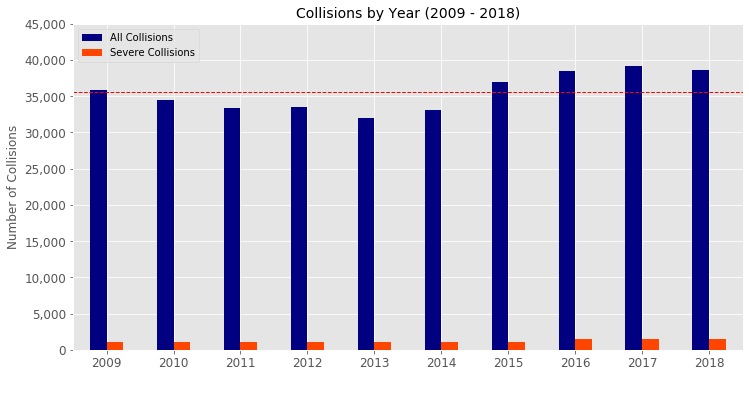

In [36]:
severe_fatal_year = collision.groupby('accident_year')['collision_severity'].agg([
    ('All Collisions', len),
    ('Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).sum()),
    ('Percent of Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).mean())
    ]
)


ax = severe_fatal_year[['All Collisions', 'Severe Collisions']].plot(
    kind='bar', 
    rot=0, 
    figsize=(12, 6), 
    color=['navy', 'orangered']
)

ax.set_title('Collisions by Year (2009 - 2018)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 45000])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(severe_fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

pass

### Collision trend - plotly

In [58]:
# Collisions by Year
fig = go.Figure()
fig2 = go.Figure()

fig.add_trace(go.Bar(x=severe_fatal_year.index, 
                     y=severe_fatal_year['All Collisions'],
                     name='All',
                     marker_color='rgb(0, 0, 128)'
                    ))

fig.add_trace(go.Bar(x=severe_fatal_year.index,
                     y=severe_fatal_year['Severe Collisions'],
                    name='Severe',
                    marker_color='rgb(255, 69, 0)'
                    ))

fig.update_layout(
    title='Collisions by Year (2009 - 2018)',
    xaxis_tickfont_size=12,
    yaxis={
        'title': 'Number of Collisions',
        'titlefont_size': 12,
        'tickfont_size': 12
    },
    xaxis={
        'type': 'category'
    },
    barmode='group',
    bargap=0.45,
    bargroupgap=0.1,
)

# Collision trend with plot control
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(
        x=severe_fatal_year.index,
        y=severe_fatal_year['All Collisions'],
        name="All Collisions",
        marker_color='rgb(0, 0, 128)'
    )
)

fig2.add_trace(
    go.Scatter(
        x=severe_fatal_year.index,
        y=severe_fatal_year['Severe Collisions'],
        name="Severe Collisions",
        marker_color='rgb(255, 69, 0)'
    )
)


all_collisions = [
    dict(
        x=severe_fatal_year['All Collisions'].idxmax(),
        y=severe_fatal_year['All Collisions'].max(),
        xref="x", yref="y",
        text="{:,.0f} collisions <br> happend in {}".format(
            severe_fatal_year['All Collisions'].max(),
            severe_fatal_year['All Collisions'].idxmax()
        ),
        ax=0, 
        ay=-40
    )
]

severe_collisions = [
    dict(
        x=severe_fatal_year['Severe Collisions'].idxmax(),
        y=severe_fatal_year['Severe Collisions'].max(),
        xref="x", yref="y",
        text="{:,.0f} severe collisions <br> happend in {}".format(
            severe_fatal_year['Severe Collisions'].max(),
            severe_fatal_year['Severe Collisions'].idxmax()
        ),
        ax=0, 
        ay=-40
    )
]


fig2.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
                dict(label="All Collisions",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "All Collisions from 2009 to 2018",
                            "annotations": all_collisions}]),
                dict(label="Severe Collisions",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Severe Collisions from 2009 to 2018",
                            "annotations": severe_collisions}]),
            ]),
            bordercolor='rgb(192,192,192)'
        )
    ])


fig.show()
fig2.show()